<a href="https://colab.research.google.com/github/eashwarydubey/machine-learning/blob/main/Bank_Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/dataset/bank*

/content/drive/MyDrive/dataset/bank-full.csv



# Problem Description :
This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.



 ## Project Background
 Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.


## Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers. 

## Attribute Information

- **age**: age at the time of call
- **job**: type of job
- **marital**: marital status
- **education**: education background at the time of call
- **default**: has credit in default?
- **balance**: average yearly balance, in euros (numeric)
- **housing**: has housing loan?
- **loan**: has personal loan?
- **contact**: contact communication type
- **day**: last contact day of the month (1 -31)
- **month**: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then Target = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call Target is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- **campaign**: number of contacts performed during this campaign and for this client (includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign
- **previous**: number of contacts performed before this campaign and for this client
- **poutcome**: outcome of the previous marketing campaign
- **target**: has the client subscribed a term deposit? ('yes', 'no')

#Import Modules

In [3]:
!pip install mice
!pip install impyute

  Created wheel for mice: filename=mice-0.0.1a0-cp37-none-any.whl size=1043 sha256=b546902a75b0ca3fa65293a932c23cbbbf9a2f544edb361a5f114ee159b7e7d9
  Stored in directory: /root/.cache/pip/wheels/6c/e7/4f/1b0c52cfdb6dc95dd0ba1459459f8e4ed33cab25eccdd78d65
Successfully built mice


In [4]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
from impyute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [5]:
bank=pd.read_csv("/content/drive/MyDrive/dataset/bank-full.csv")

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- For each observation, the dataset records **16 input variables** that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.
- There is a **single binary output variable** that denotes “yes” or “no” revealing the outcomes of the phone calls.

This is a **binary clasiification** problem .

#Exploratory Data Analysis

Performing exploratory data analysis on the bank dataset. Below are some of the steps performed:

- Get descriptive statistics including five point summary
- Check unique values in object columns
- Check distribution of Target column
- Count plot by Target for categorical columns (job, marital, education, default, housing, loan, contact, day, month, poutcome)
Check outliers in each numerical columna (age, balance, duration, campaign, pdays, previous)
- Distribution of numerical columns (with and without outliers)
- Distribution of numerical columns for Target values (subscribed and didn`t subscribed to term deposit)
- Fill outliers with upper and lower percentile values being 99 and 1, respectively by nan values
- Frequency encoding for categorical columns with string values
- Convert type of categorical columns (job, marital, education, default, housing, loan, contact, day, month, poutcome, Target) to float for MICE training. Creating multiple imputations, as opposed to single imputations to complete datasets, accounts for the statistical uncertainty in the imputations. MICE algorithms works by running multiple regression models and each missing value is modeled conditionally depeding on the observed (non-missing) values.
- Get correlation matrix and check absolute correlation of independent variables with Target. Drop columns based on these.
- Create age groups and check if there is relation with balance and target, campaign and target.

## Five point summary of numerical attributes and check unique values in 'object' columns

In [8]:
bank.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [9]:
columns = bank.loc[:, bank.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{bank[cols].unique()}\n')

Unique values for job is 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital is 
['married' 'single' 'divorced']

Unique values for education is 
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default is 
['no' 'yes']

Unique values for housing is 
['yes' 'no']

Unique values for loan is 
['no' 'yes']

Unique values for contact is 
['unknown' 'cellular' 'telephone']

Unique values for month is 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for poutcome is 
['unknown' 'failure' 'other' 'success']

Unique values for Target is 
['no' 'yes']



## Checking the distribution of target variable

In [60]:
display(bank['Target'].value_counts(), bank['Target'].value_counts(normalize = True)*100)

0    39922
1     5289
Name: Target, dtype: int64

0    88.30152
1    11.69848
Name: Target, dtype: float64

###Observation
Target variable is highly imbalanced.

Out of 45211 cases, only 5289 (=11.69%) are the cases where the client has subscribed to the term deposit.

In [61]:
# Replace values in some of the categorical columns
replace_values = {'education': {'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3}, 'Target': {'no': 0, 'yes': 1},
                  'default': {'no': 0, 'yes': 1}, 'housing': {'no': 0, 'yes': 1}, 'loan': {'no': 0, 'yes': 1},
                  'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

bank = bank.replace(replace_values)

TypeError: ignored

In [ ]:
# Convert columns to categorical types
# also include day as category variable to as numeric
columns.extend(['day'])
for cols in columns:
    bank[cols] = bank[cols].astype('category')

In [ ]:
# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'Distribution of {col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'Distribution of {col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()
    
def target_plot(df, col, target = 'Target'):
    fig = plt.figure(figsize = (15, 7.2))
    # Distribution for 'Target' -- didn't subscribed, considering outliers   
    ax = fig.add_subplot(121)
    sns.distplot(df[(df[target] == 0)][col], color = 'c', 
                 ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Didn\'t subscribed')

    # Distribution for 'Target' -- Subscribed, considering outliers
    ax= fig.add_subplot(122)
    sns.distplot(df[(df[target] == 1)][col], color = 'b', 
             ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Subscribed')
    return plt.show()

def target_count(df, col1, col2):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col1.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v', 
                  hue = 'Target').set_title(col2.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)
    return plt.show()

#Univariate and Bivariate Visualization
Looking at one feature at a time to understand how are the values distributed, checking outliers, checking relation of the column with Target column (bi).

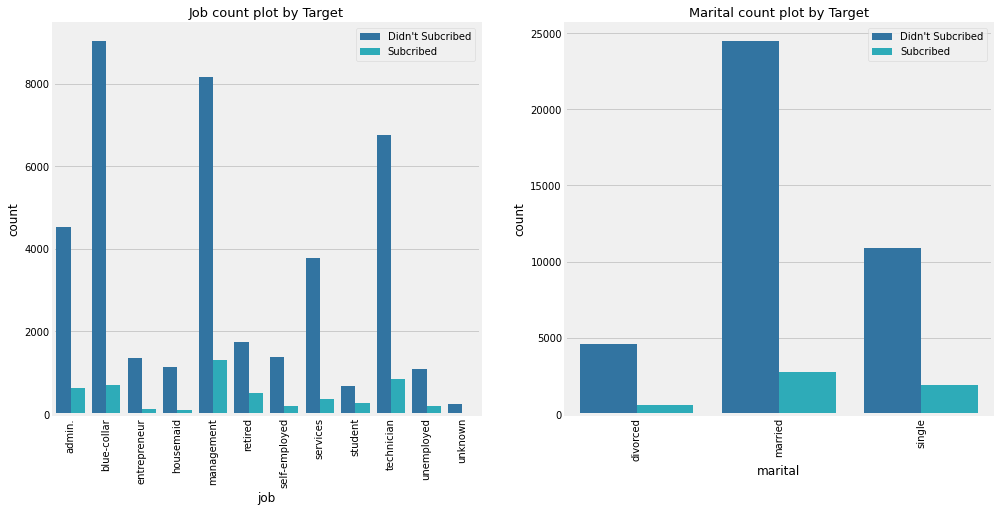

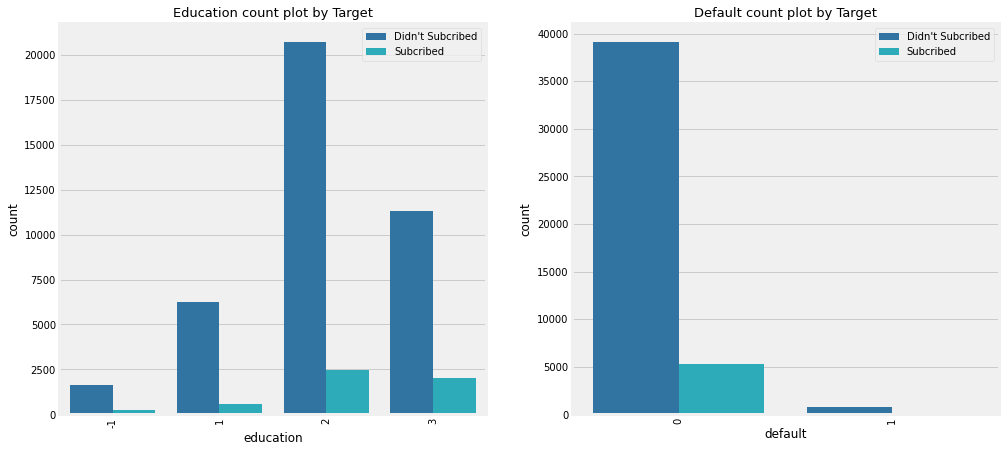

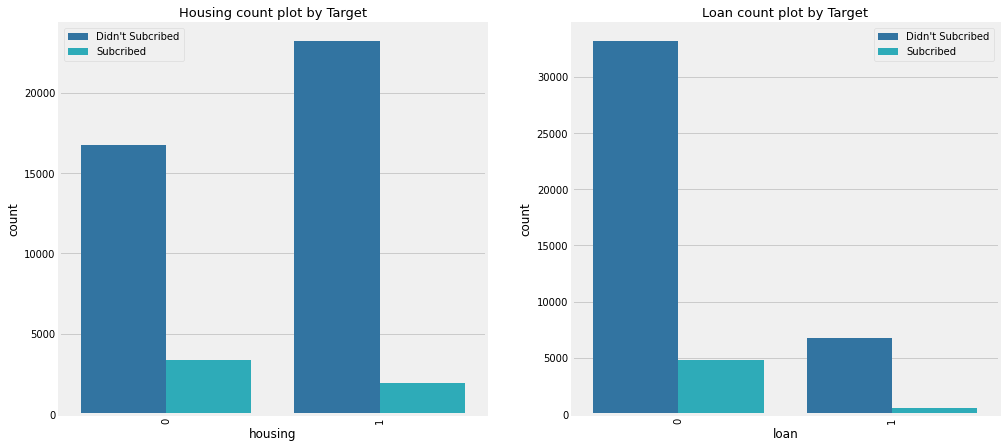

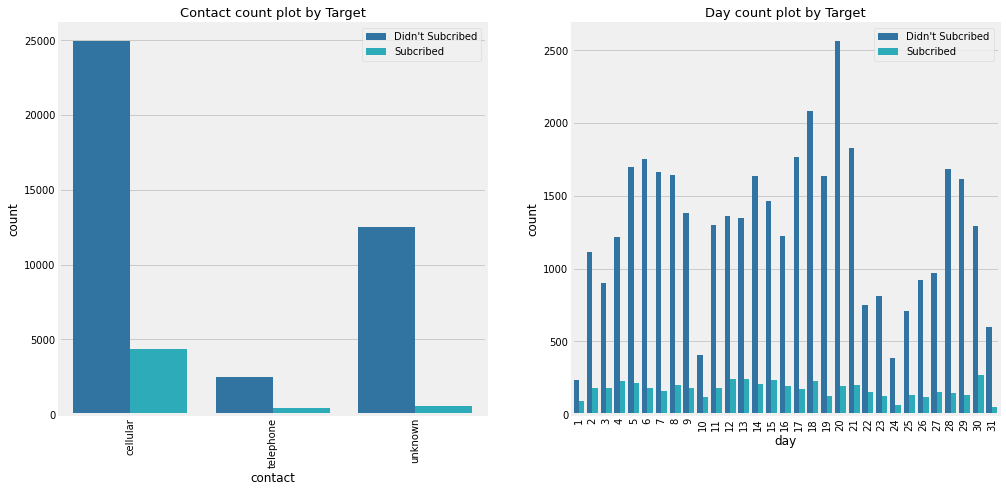

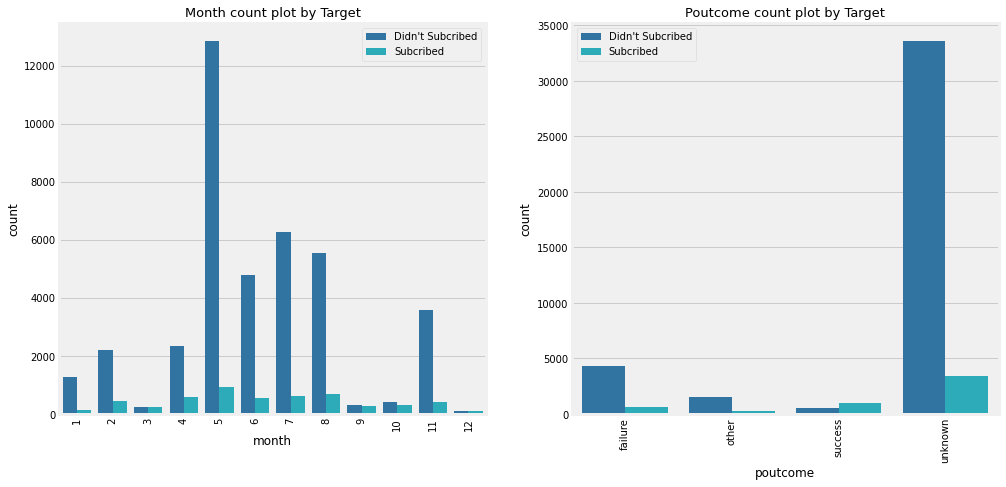

In [14]:
#Subscribe and didn't subscribe for categorical columns
target_count(bank, 'job', 'marital')
target_count(bank, 'education', 'default')
target_count(bank, 'housing', 'loan')
target_count(bank, 'contact', 'day')
target_count(bank, 'month', 'poutcome')

## Observation
- Management have a subscription rate of ~25 percent followed by technician.
- Married and single clients are more likely to subscribe then divorced clients
- Clients with education of secondary followed by tertiary are more likely to subscribe to term deposits
- Most of the clients don't have credit in default and their subscription rate is higher then people with default
- Cellular communication type have higher subscription rate
- Most of the subscription were made in May and August

## Check outlier and distribution for numerical columns and also plot it's relation with target variable

Age column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,1,0,425,0,0,telephone,2,2,912,1,-1,0,unknown,0
29261,75,retired,divorced,1,0,46,0,0,cellular,2,2,294,1,-1,0,unknown,0
29263,75,retired,married,1,0,3324,0,0,cellular,2,2,149,1,-1,0,unknown,0
29322,83,retired,married,3,0,6236,0,0,cellular,2,2,283,2,-1,0,unknown,0
29865,75,retired,divorced,1,0,3881,1,0,cellular,4,2,136,3,-1,0,unknown,1


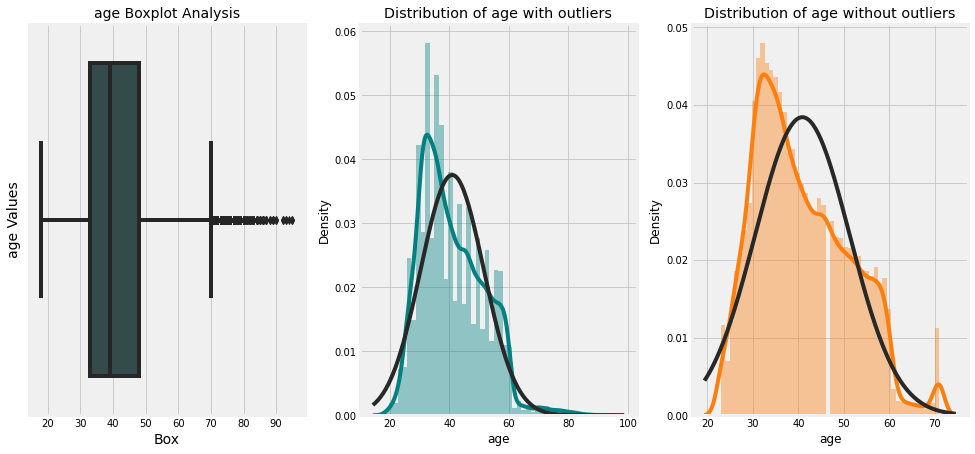

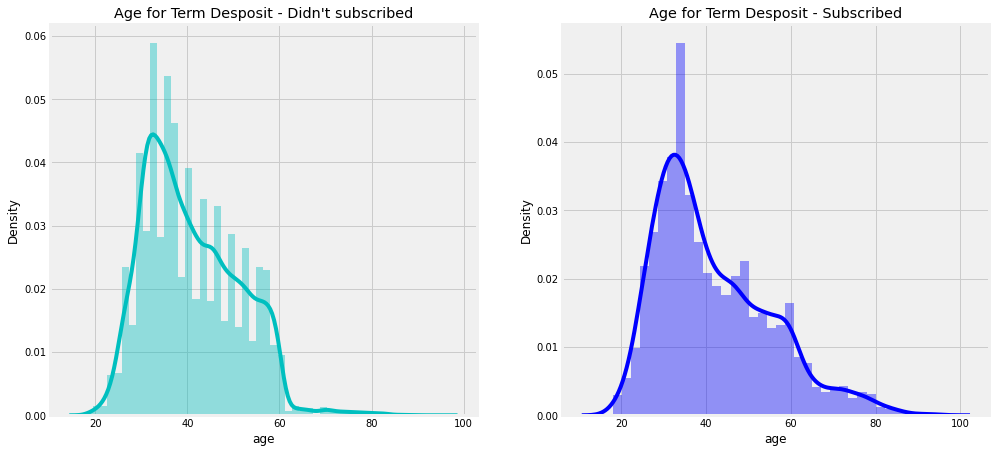

In [15]:
# Outlier, distribution for 'age' column
Q3 = bank['age'].quantile(0.75)
Q1 = bank['age'].quantile(0.25)
IQR = Q3 - Q1

print('Age column', '--'*55)
display(bank.loc[(bank['age'] < (Q1 - 1.5 * IQR)) | (bank['age'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'age')

# Distribution of 'age' by 'Target'
target_plot(bank, 'age')

Balance column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,3,0,10635,1,0,unknown,5,5,336,1,-1,0,unknown,0
65,51,management,married,3,0,6530,1,0,unknown,5,5,91,1,-1,0,unknown,0
69,35,blue-collar,single,2,0,12223,1,1,unknown,5,5,177,1,-1,0,unknown,0
70,57,blue-collar,married,2,0,5935,1,1,unknown,5,5,258,1,-1,0,unknown,0
186,40,services,divorced,-1,0,4384,1,0,unknown,5,5,315,1,-1,0,unknown,0


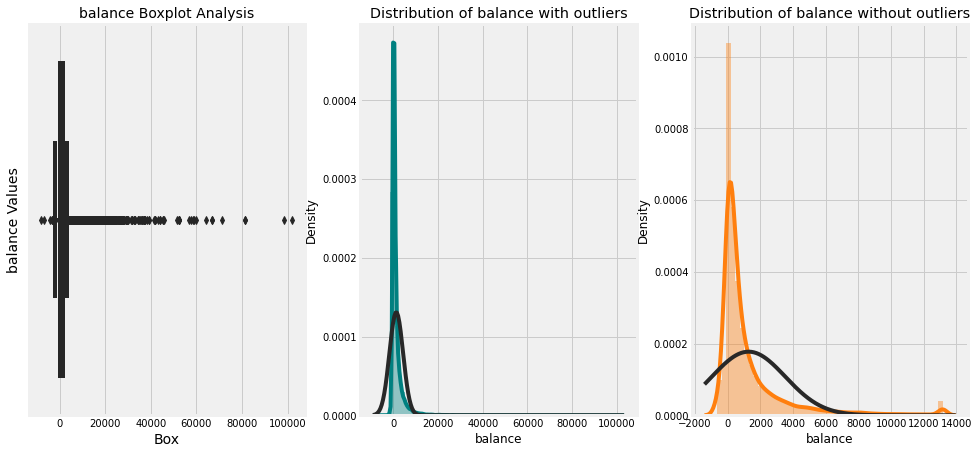

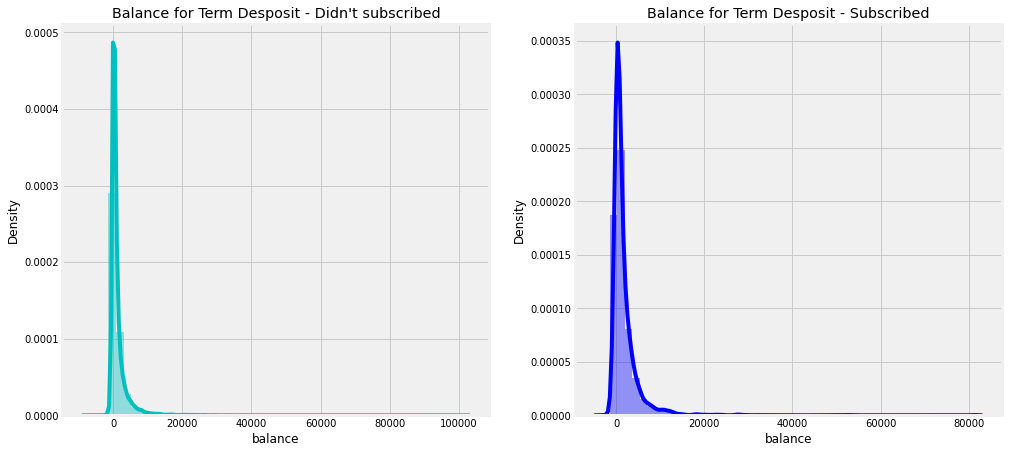

In [16]:
# Outlier, distribution for 'balance' column
Q3 = bank['balance'].quantile(0.75)
Q1 = bank['balance'].quantile(0.25)
IQR = Q3 - Q1
print('Balance column', '--'*55)
display(bank.loc[(bank['balance'] < (Q1 - 1.5 * IQR)) | (bank['balance'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'balance')

# Distribution of 'balance' by 'Target'
target_plot(bank, 'balance')

Duration column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,2,0,-3,0,0,unknown,5,5,1666,1,-1,0,unknown,0
43,54,retired,married,2,0,529,1,0,unknown,5,5,1492,1,-1,0,unknown,0
53,42,admin.,single,2,0,-76,1,0,unknown,5,5,787,1,-1,0,unknown,0
59,46,services,married,1,0,179,1,0,unknown,5,5,1778,1,-1,0,unknown,0
61,53,technician,divorced,2,0,989,1,0,unknown,5,5,812,1,-1,0,unknown,0


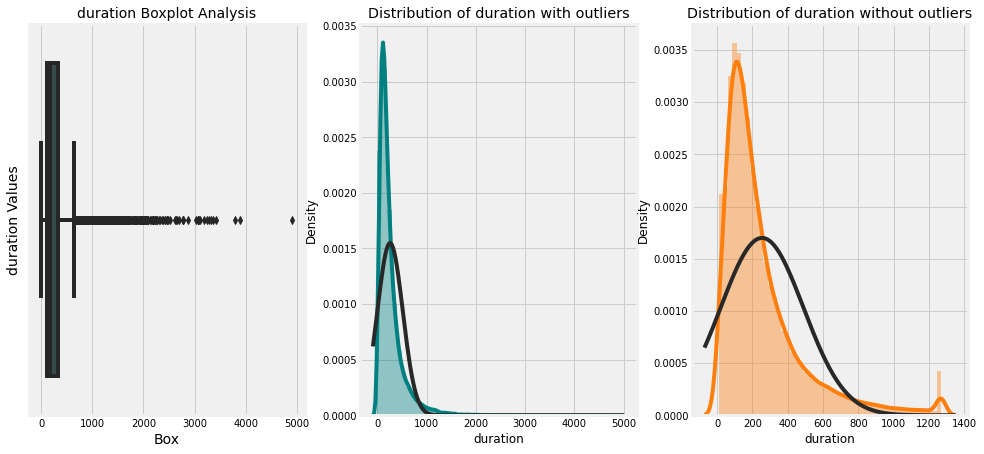

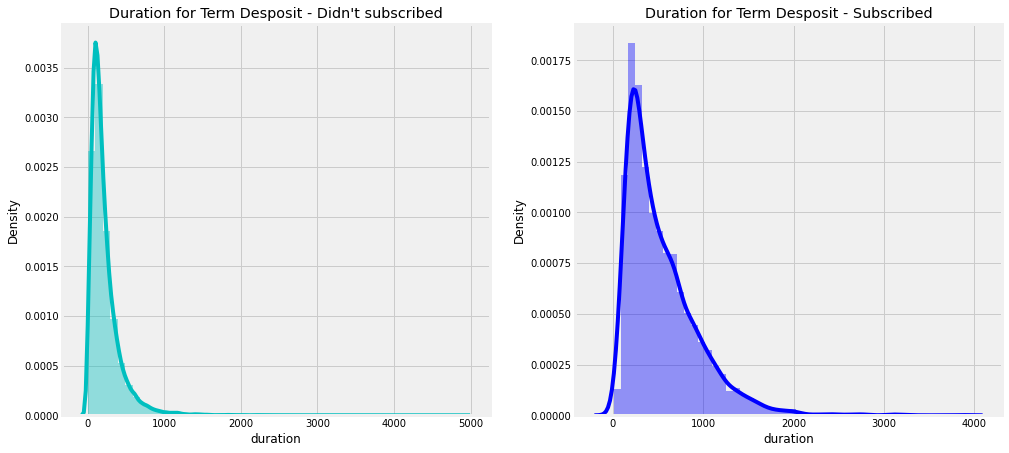

In [17]:
# Outlier, distribution for 'duration' column
Q3 = bank['duration'].quantile(0.75)
Q1 = bank['duration'].quantile(0.25)
IQR = Q3 - Q1

print('Duration column', '--'*54)
display(bank.loc[(bank['duration'] < (Q1 - 1.5 * IQR)) | (bank['duration'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'duration')

# Distribution of 'duration' by 'Target'
target_plot(bank, 'duration')

Campaign column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
758,59,services,married,2,0,307,1,1,unknown,6,5,250,7,-1,0,unknown,0
780,30,admin.,married,2,0,4,0,0,unknown,7,5,172,8,-1,0,unknown,0
906,27,services,single,2,0,0,1,0,unknown,7,5,388,7,-1,0,unknown,0
1103,52,technician,married,-1,0,133,1,0,unknown,7,5,253,8,-1,0,unknown,0
1105,43,admin.,married,3,0,1924,1,0,unknown,7,5,244,7,-1,0,unknown,0


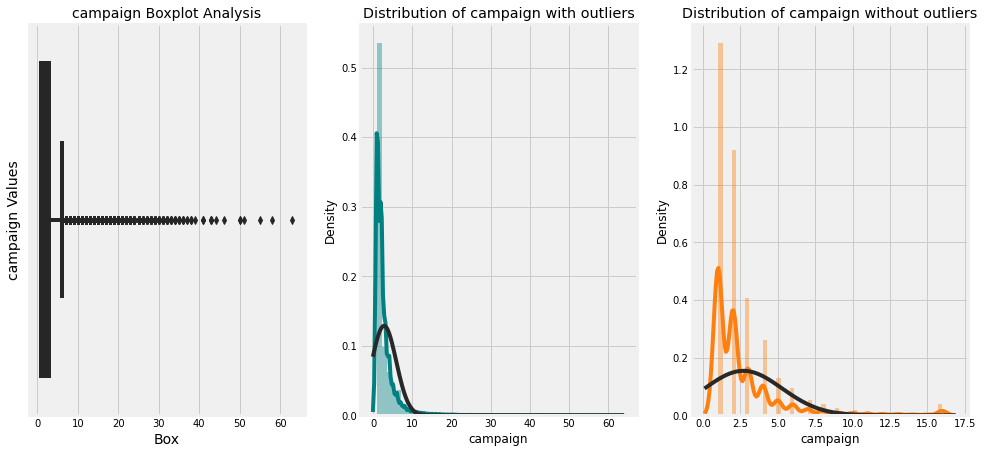

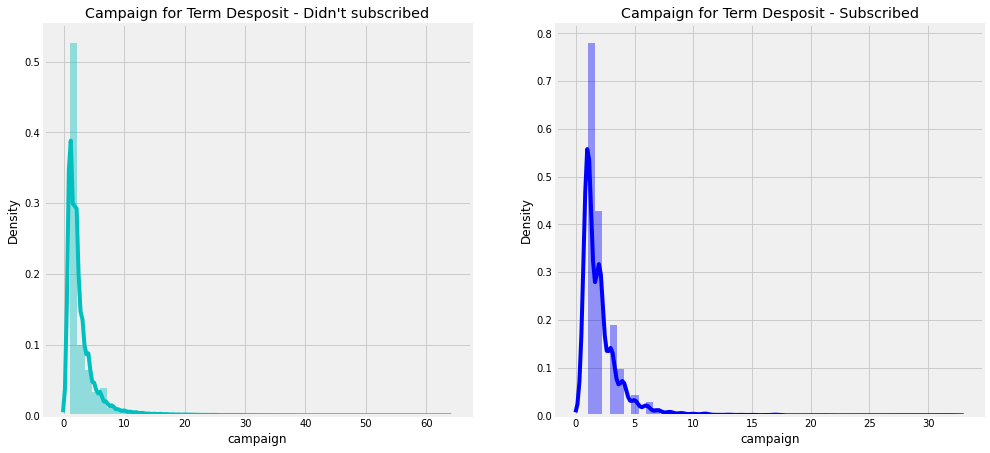

In [18]:
# Outlier, distribution for 'campaign' column
Q3 = bank['campaign'].quantile(0.75)
Q1 = bank['campaign'].quantile(0.25)
IQR = Q3 - Q1

print('Campaign column', '--'*54)
display(bank.loc[(bank['campaign'] < (Q1 - 1.5 * IQR)) | (bank['campaign'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'campaign')

# Distribution of 'campaign' by 'Target'
target_plot(bank, 'campaign')

Pdays column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


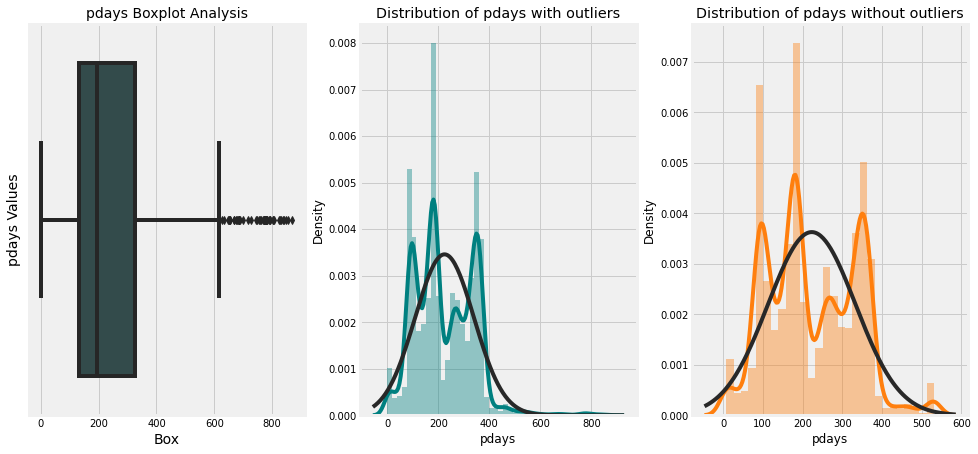

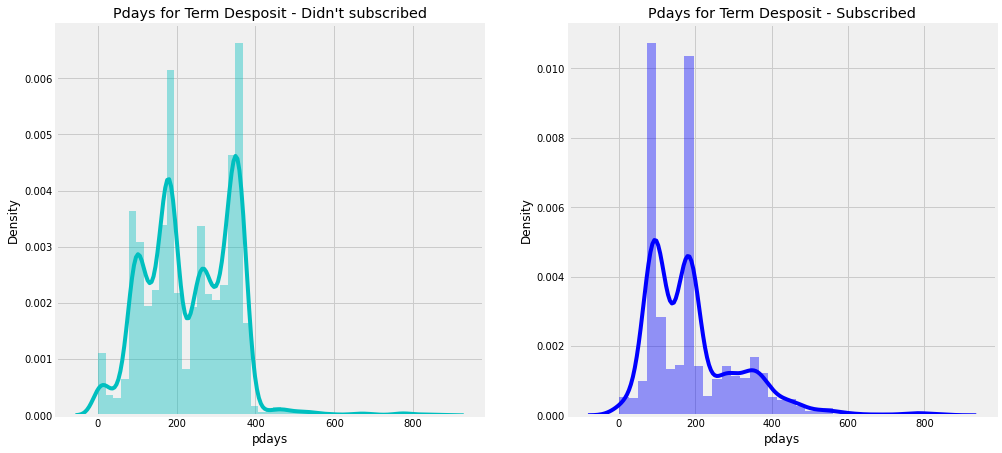

In [19]:
# Outlier, distribution for 'pdays' column
Q3 = bank['pdays'].quantile(0.75)
Q1 = bank['pdays'].quantile(0.25)
IQR = Q3 - Q1

print('Pdays column', '--'*55)
display(bank.loc[(bank['pdays'] < (Q1 - 1.5 * IQR)) | (bank['pdays'] > (Q3 + 1.5 * IQR))].head())

# Check outlier in 'pdays', not considering -1
pdays = bank.loc[bank['pdays'] > 0, ['pdays', 'Target']]
pdays = pd.DataFrame(pdays, columns = ['pdays', 'Target'])
odp_plots(pdays, 'pdays')

# Distribution of 'pdays' by 'Target', not considering -1
target_plot(pdays, 'pdays')

Previous column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


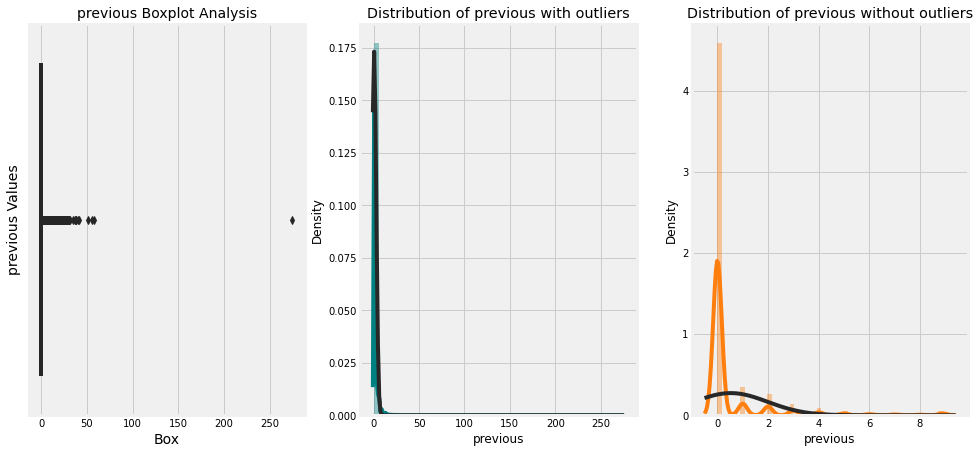

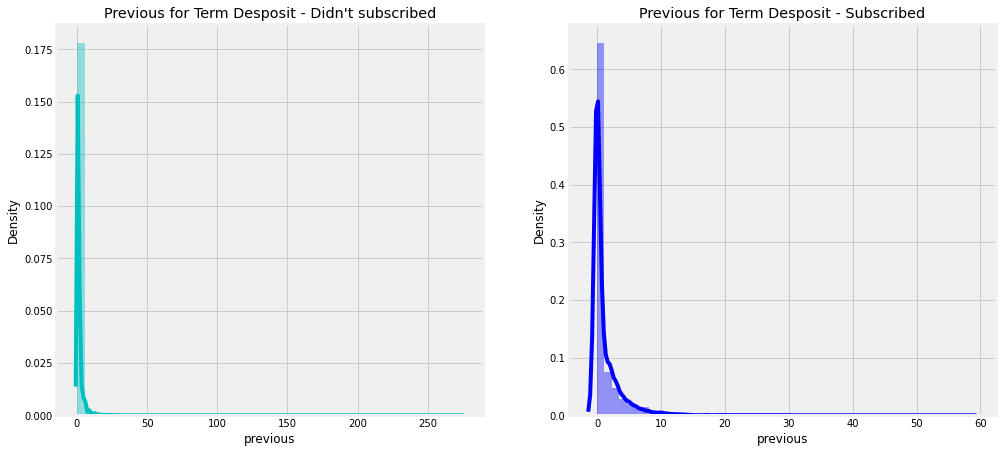

In [20]:
# Outlier, distribution and probability plot for 'previous' column
Q3 = bank['previous'].quantile(0.75)
Q1 = bank['previous'].quantile(0.25)
IQR = Q3 - Q1

print('Previous column', '--'*54)
display(bank.loc[(bank['previous'] < (Q1 - 1.5 * IQR)) | (bank['previous'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'previous')

# Distribution of 'previous' by 'Target'
target_plot(bank, 'previous')

## Observation
Used quantile method to check outliers in numerical column. 

It appears that there are outliers in each of the numerical columns.

It appears that removing outliers below 25% percentile and above 75% percentile will bring the age and pdays columns to almost normal distribution.

## Basic Data Cleaning
Remove outliers with upper and lower percentile values being 99 and 1, respectively and get dummies

In [21]:
print('Categorical Columns: \n{}'.format(list(bank.select_dtypes('category').columns)))
print('\nNumerical Columns: \n{}'.format(list(bank.select_dtypes(exclude = 'category').columns)))

Categorical Columns: 
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'Target']

Numerical Columns: 
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [22]:
# Removing outliers with upper and lower percentile values being 99 and 1, respectively
bank_nulls = bank.copy(deep = True)
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in columns:
    upper_lim = np.percentile(bank_nulls[col].values, 99)
    lower_lim = np.percentile(bank_nulls[col].values, 1)
    bank_nulls.loc[(bank_nulls[col] > upper_lim), col] = np.nan
    bank_nulls.loc[(bank_nulls[col] < lower_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', columns)

Column for which outliers where removed with upper and lower percentile values: 
 ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [23]:
# pd.get_dummies ,#, drop_first = True/False , default is False, but keeping it True can reduce data duplication

cols_to_transform = ['job', 'marital', 'contact', 'poutcome']
bank_nulls = pd.get_dummies(bank_nulls, columns = cols_to_transform) 
print('Got dummies for \n', cols_to_transform)
bank_nulls.info()

Got dummies for 
 ['job', 'marital', 'contact', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                44473 non-null  float64 
 1   education          45211 non-null  category
 2   default            45211 non-null  category
 3   balance            44308 non-null  float64 
 4   housing            45211 non-null  category
 5   loan               45211 non-null  category
 6   day                45211 non-null  category
 7   month              45211 non-null  category
 8   duration           44341 non-null  float64 
 9   campaign           44760 non-null  float64 
 10  pdays              44826 non-null  float64 
 11  previous           44758 non-null  float64 
 12  Target             45211 non-null  category
 13  job_admin.         45211 non-null  uint8   
 14  job_blue-collar    45211 non-null  uint8  

In [24]:
#Mice imputer has prerequisite that it only works on numerical data
# Convert 'astype' of categorical columns to integer for getting it ready for MICE
columns = ['education', 'default', 'housing', 'loan', 'day', 'month', 'Target']
for col in columns:
    bank_nulls[col] = bank_nulls[col].astype('float')

## Use MICE imputer to handled outliers that were filled with np.nan in the earlier step

In [25]:
# start the MICE training
bank_imputed = mice(bank_nulls.values)
bank_imputed = pd.DataFrame(bank_imputed, columns = bank_nulls.columns)

display(bank.describe(include = 'all').T, bank_imputed.describe(include = 'all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,2,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,0,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,1,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,0,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,31,20,2752,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.836870,10.073690,23.000000,33.0,39.0,48.0,71.743841
education,45211.0,2.019442,0.902795,-1.000000,2.0,2.0,3.0,3.000000
default,45211.0,0.018027,0.133049,0.000000,0.0,0.0,0.0,1.000000
balance,45211.0,1174.932363,1898.534988,-812.502754,81.0,467.0,1402.0,13164.000000
housing,45211.0,0.555838,0.496878,0.000000,0.0,1.0,1.0,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.0,0.0,0.0,1.000000
day,45211.0,15.806419,8.322476,1.000000,8.0,16.0,21.0,31.000000
month,45211.0,6.144655,2.408034,1.000000,5.0,6.0,8.0,12.000000
duration,45211.0,247.428930,211.290370,11.000000,106.0,183.0,316.0,1269.000000
campaign,45211.0,2.562222,2.214906,1.000000,1.0,2.0,3.0,16.000000


In [26]:
bank_imputed[bank_imputed["pdays"]<=0].pdays.value_counts()

-1.000000     36954
-47.832018        1
-5.384608         1
Name: pdays, dtype: int64

In [27]:
# Checking whether count of 0 in previous is equal to count of -1 in pdays
display(bank_imputed.loc[bank_imputed['previous'] == 0, 'previous'].value_counts().sum(), 
        bank_imputed.loc[bank_imputed['pdays'] == -1, 'pdays'].value_counts().sum())

36954

36954

## Observation  - pdays and previous
Count of 0 in previous is equal to count of -1 in pdays column, we might replace -1 in pdays with 0 to account for cases where the client wasn't contacted previously. Checking correlation between variables and target next...

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix of Data')

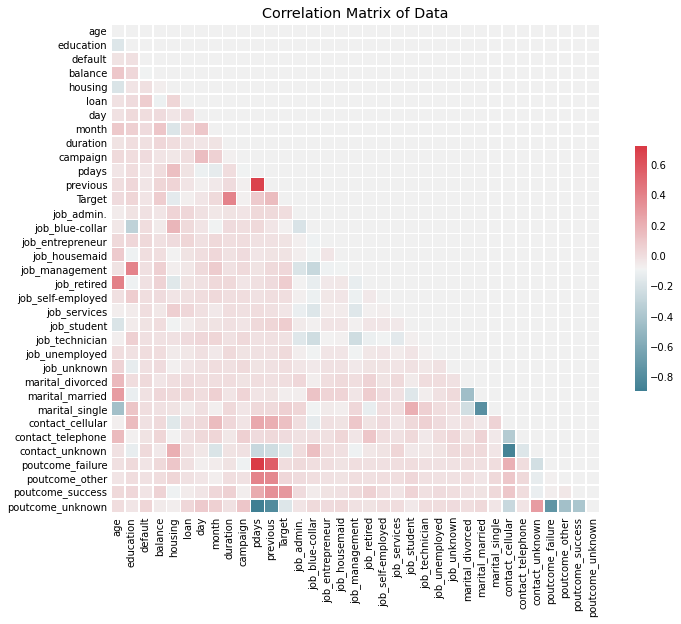

In [28]:
# Correlation matrix for all variables
corr = bank_imputed.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
ax.set_title('Correlation Matrix of Data')

In [29]:
# Filter for correlation value greater than 0.8
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.8) & (sort < 1)]

pdays             poutcome_unknown    0.891235
poutcome_unknown  pdays               0.891235
contact_unknown   contact_cellular    0.862398
contact_cellular  contact_unknown     0.862398
previous          poutcome_unknown    0.806952
poutcome_unknown  previous            0.806952
dtype: float64

In [30]:
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = bank_imputed.drop('Target', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank_imputed['Target'].corr(bank_imputed[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,duration,0.398107
32,poutcome_success,0.306788
33,poutcome_unknown,0.167051
11,previous,0.153341
29,contact_unknown,0.150935
4,housing,0.139173
27,contact_cellular,0.135873
10,pdays,0.0865931
17,job_retired,0.0792453
3,balance,0.0769227


## Observation - Correlation Matrix
poutcome_unknown and pdays; contact_unknown and contact_cellular; poutcome_unknown and previous; marital_married and marital_single; poutcome_unknown and poutcome_failure; pdays and poutcome_failure; previous and pdays; poutcome_failure and previous columns are correlated with each other.

duration, poutcome_success, poutcome_unknown and previous are few columns which have a relatively strong correlation with Target column.

In [31]:
bank_imputed_correrated = bank_imputed.copy(deep = True)  #dataframe containing corrleated columns
bank_imputed.drop(['pdays', 'contact_cellular'], axis = 1, inplace = True) #, 'previous', 'marital_married', 'poutcome_failure'

# Feature Engineering
We will be doing basic feature engineering like binning and afterwards if required will do more for better results .



### Creating age groups and check relation with balance and target; also with campaign and target

In [32]:
bank_imputed.loc[(bank_imputed['age'] < 30), 'age_group'] = 20
bank_imputed.loc[(bank_imputed['age'] >= 30) & (bank_imputed['age'] < 40), 'age_group'] = 30
bank_imputed.loc[(bank_imputed['age'] >= 40) & (bank_imputed['age'] < 50), 'age_group'] = 40
bank_imputed.loc[(bank_imputed['age'] >= 50) & (bank_imputed['age'] < 60), 'age_group'] = 50
bank_imputed.loc[(bank_imputed['age'] >= 60), 'age_group'] = 60

Text(0.5, 1.0, 'Relationship between balance and age group by Target')

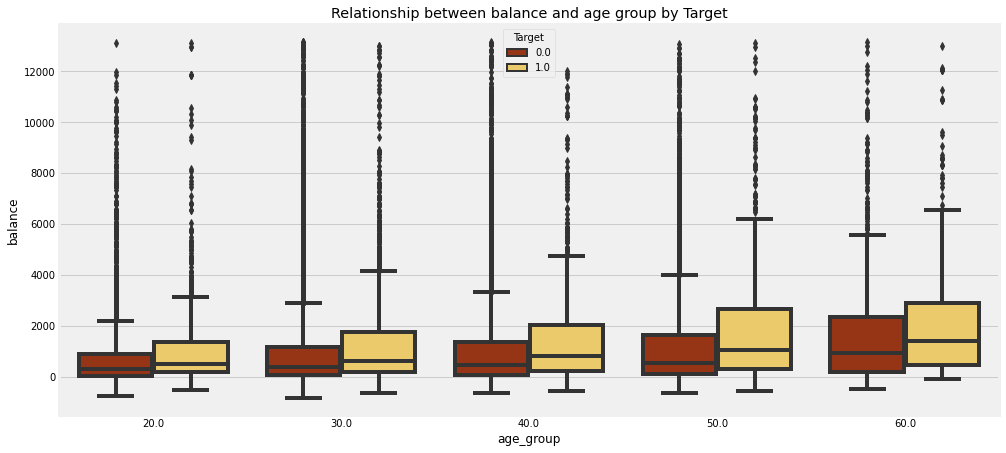

In [33]:
# Check relationship between balance and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'balance', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between balance and age group by Target')

Text(0.5, 1.0, 'Relationship between campaign and age group by Target')

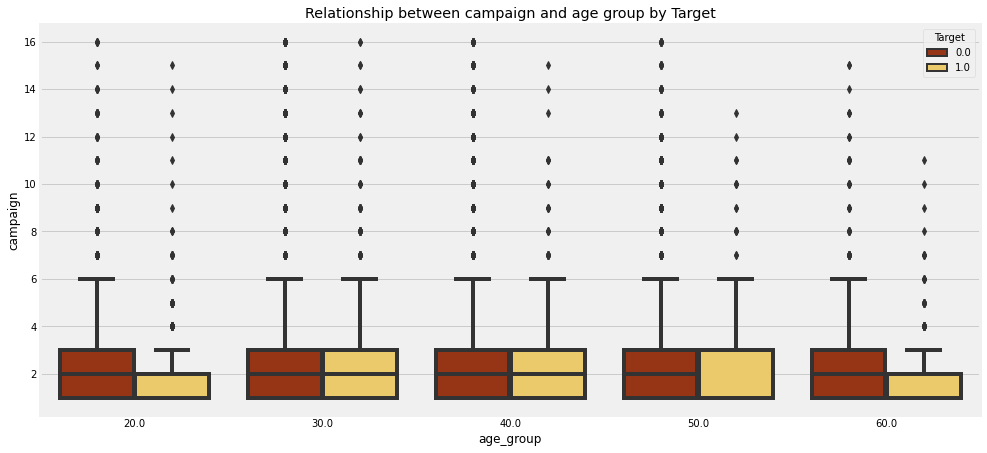

In [34]:
# Check relationship between campaign and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'campaign', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between campaign and age group by Target')

## Observation  
Created age_group and checked it's relation with balance and target and it appears that higher the balance range more are the chances that the client would subscribe to the term deposit irrespective of age group. It also appears that clients within age group 50 have the highest range of balance.

Then checked relation between campaign, age group and target and it appears that campaigns for client with age group 20 and 60 are less.

# Visualize the relationship between 'duration' & 'campaign': with response result

In [35]:

call_duration_min=bank_imputed[['duration','campaign','Target']]
call_duration_min['duration']=call_duration_min['duration']/60

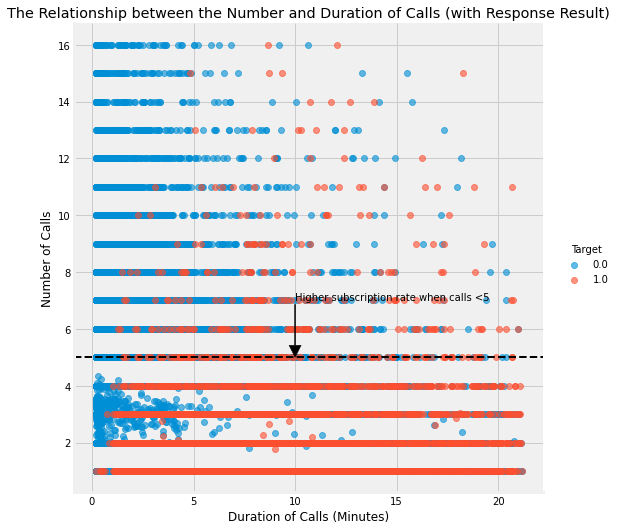

In [36]:
sns.lmplot(x='duration', y='campaign',data = call_duration_min,
                     hue = 'Target',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)


# plt.axis([0,20,0,20])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (10,7),
             arrowprops=dict(color = 'k', width=1),xy=(10,5))
plt.show()

## Observation
In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

In [37]:
pd.crosstab(bank_imputed['Target'],bank_imputed['month'])

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Target,,,,,,,,,,,,
0.0,1261,2208,229,2355,12841,4795,6268,5559,310,415,3567,114
1.0,142,441,248,577,925,546,627,688,269,323,403,100


In [38]:

count_month_response_pct=pd.crosstab(bank_imputed['Target'],bank_imputed['month']).apply(lambda x: x/x.sum() * 100).T

count_month_response_pct

Target,0.0,1.0
month,,
1.0,89.878831,10.121169
2.0,83.352208,16.647792
3.0,48.008386,51.991614
4.0,80.320600,19.679400
5.0,93.280546,6.719454
6.0,89.777195,10.222805
7.0,90.906454,9.093546
8.0,88.986714,11.013286
9.0,53.540587,46.459413


In [39]:
x=pd.DataFrame()
x['%Contacted']=bank_imputed['month'].value_counts(normalize=True)*100
x=x.sort_index()
x['%Subscription']=count_month_response_pct[1]
x

,%Contacted,%Subscription
1.0,3.103227,10.121169
2.0,5.859194,16.647792
3.0,1.055053,51.991614
4.0,6.485147,19.679400
5.0,30.448342,6.719454
6.0,11.813497,10.222805
7.0,15.250713,9.093546
8.0,13.817434,11.013286
9.0,1.280662,46.459413
10.0,1.632346,43.766938


Text(0.5, 0, 'Month')

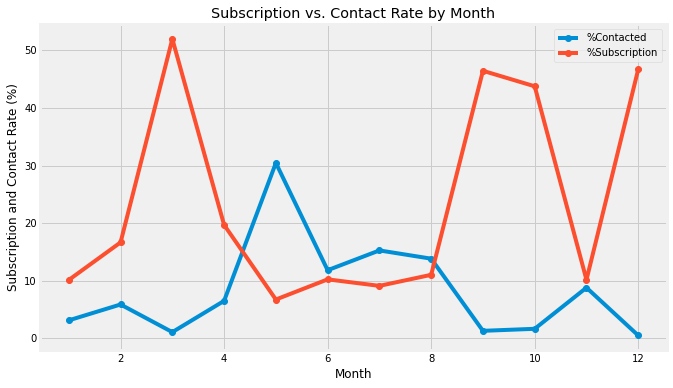

In [40]:
x.plot(kind ='line',figsize = (10,6),marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate (%)')
plt.xlabel('Month')


The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.
However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.

Clearly, these **two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign.** To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.


Nevertheless, the bank should be cautious when analyzing external factors. 


# Modelling

In [41]:
# Separating dependent and independent variables
X = bank_imputed.drop(['Target'], axis = 1)
y = bank_imputed['Target']

# Splitting the data into training and test set in the ratio of 80:20 respectively
X_train_t, X_test, y_train_t, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [42]:
X_train, X_cv, y_train, y_cv =  train_test_split(X_train_t,y_train_t,test_size = 0.2, random_state = random_state)

In [43]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predict_cv = lr.predict(X_cv)


## Observation
The result of accuracy score can possibly yield misleading result if the data set is unbalanced, because the number of observations in different classes largely vary.

We will be using precision , recall ,F1 score

- Precision – Accuracy of positive predictions.
-- Precision = TP/(TP + FP)

- Recall – What percent of the positive cases did you catch? 
-- Recall = TP/(TP+FN)

- F1 score – What percent of positive predictions were correct? 
-- F1-score = (2 x Precision x Recall)/(Precision + Recall) 
The harmonic mean gives more weight to the lower value, so a **high F1-score means that both precision and recall are high.**




Text(0.5, 18.5, 'Predicted')

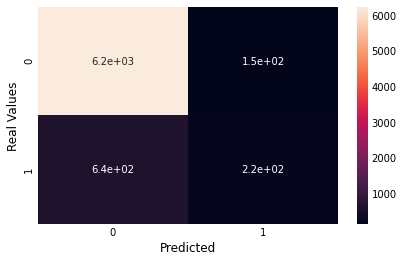

In [45]:
sns.heatmap(confusion_matrix(y_cv, y_predict_cv), annot = True)
plt.ylabel('Real Values')
plt.xlabel('Predicted')

In [46]:
tn, fp, fn, tp =confusion_matrix(y_cv, y_predict_cv).ravel()
display(tn, fp, fn, tp)

6233

149

635

217

In [47]:

print(classification_report(y_cv, y_predict_cv))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      6382
         1.0       0.59      0.25      0.36       852

    accuracy                           0.89      7234
   macro avg       0.75      0.62      0.65      7234
weighted avg       0.87      0.89      0.87      7234



## Observation
We want to increase our true positive  but need to keep an eye on false positive and false negative . 
So what will  be the penalty , in fraud like case if its a fraud and we predicted it as not fraud i.e. **False Negative** penalty is very high , but in this situation its only a call to convert lead into customer/sale ,impact is less but **too much false positives will result in loosing the opportunity**  for converting lead to customer, it should be fine tuned.

If **false positives increases** too much than we will call/focus on customers that are not intrested , it is waste of time/resources also calling too much will **impact customer experience** which can lead to future lead conversion . Penalty is not that critical .






In [48]:
warnings.filterwarnings("ignore")
def select_model(X_train,y_train,folds,models_list,refit_strategy="f1"):

    
    train_x, train_y = X_train,y_train
    
    if len(models_list) ==0:
      print("atleast 1 model is required")
      return 0

    models = models_list
    result = {}

  
    scoring_strategy = ['accuracy', 'precision','precision_macro','recall','recall_macro','f1','f1_macro']
    for model in models:
      print(model["name"])
      grid = GridSearchCV(model["estimator"],param_grid=model["hyperparameters"],cv=folds,scoring=scoring_strategy,refit=refit_strategy)
      grid.fit(train_x,train_y)

      model["best_params"] = grid.best_params_
      model["best_score"] = grid.best_score_
      model["best_model"] = grid.best_estimator_
      print("Best parameters: ", model["best_params"])
      print("Best score: ", model["best_score"])
      print("Best estimator: ", model["best_model"])
 

In [49]:
#initilize model which contains all algorithms with hyperparameters to tune
models = []


In [50]:
rfc = {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(),
        "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2,3,5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
        }
    }
models.append(rfc)

#we can add many models like above






In [51]:
logclassfier = {
    "name":"LogisticRegressionClassfier",
    "estimator":LogisticRegression(),
    "hyperparameters":{
        "C":[10**x  for x in range(-3,2)],
        "penalty":["l2","l1"],
        "max_iter": [100, 110, 120, 130, 140]
    }

    
}
models.append(logclassfier)

In [52]:
model=select_model(X_train,y_train,10,[logclassfier])

LogisticRegressionClassfier
Best parameters:  {'C': 1, 'max_iter': 140, 'penalty': 'l2'}
Best score:  0.36252912739140497
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [53]:
# Helper function for making prediction and evaluating scores
def train_and_predict(n_splits, base_model, X, y, name, subscribe = 1, oversampling = False):
    features = X.columns
    X = np.array(X)
    y = np.array(y)
    
    folds = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state).split(X, y))
    
   
    
    accuracy = []

    precision_subscribe = []
    recall_subscribe = []
    f1_subscribe = []
    
    precision_macro = []
    recall_macro = []
    f1_macro = []
    
    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):
            
            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]
            
            if oversampling:
                sm = SMOTE(random_state = random_state, sampling_strategy = 'minority')
                X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
           
            # fit the model
                clf.fit(X_train_res, y_train_res)

            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train_res, y_train_res)
                test_ = clf.score(X_test, y_test)
            
            else:
            
            # fit the model
                clf.fit(X_train, y_train)

            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train, y_train)
                test_ = clf.score(X_test, y_test)
                      
            # Other scores
            accuracy_ = accuracy_score(y_true, y_pred).round(3)
            
            precision_b = precision_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            recall_b = recall_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            f1_b = f1_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            
            precision_m = precision_score(y_true, y_pred, average = 'macro').round(3)
            recall_m = recall_score(y_true, y_pred, average = 'macro').round(3)
            f1_m = f1_score(y_true, y_pred, average = 'macro').round(3)
            
            print(f'Model- {name.capitalize()} and CV- {j}')
            print('-'*20)
            print('Training Score: {0:.3f}'.format(train_))
            print('Test Score: {0:.3f}'.format(test_))
            
            print('Accuracy Score: {0:.3f}'.format(accuracy_))
            
            print('Precision Score - Subscribe: {0:.3f}'.format(precision_b))
            print('Recall Score - Subscribe: {0:.3f}'.format(recall_b))
            print('f1 Score - Subscribe: {0:.3f}'.format(f1_b))
            
            print('Precision Score - Macro: {0:.3f}'.format(precision_m))
            print('Recall Score - Macro: {0:.3f}'.format(recall_m))
            print('f1 Score - Macro: {0:.3f}'.format(f1_m))
            print('\n')
            
            ## Appending scores   
            accuracy.append(accuracy_)
            precision_subscribe.append(precision_b)
            recall_subscribe.append(recall_b)
            f1_subscribe.append(f1_b)
            precision_macro.append(precision_m)
            recall_macro.append(recall_m)
            f1_macro.append(f1_m)
                       
            # Creating a dataframe of scores
            df = pd.DataFrame([np.mean(accuracy).round(3), np.mean(precision_subscribe).round(3), 
                               np.mean(precision_macro).round(3), np.mean(recall_subscribe).round(3), 
                               np.mean(recall_macro).round(3), np.mean(f1_subscribe).round(3), 
                               np.mean(f1_macro).round(3)], columns = [name]).T
            df.columns = ['Accuracy', 'Precision_Subscribe', 'Precision_Macro',
                          'Recall_Subscribe', 'Recall_Macro', 'f1_Subscribe', 'f1_Macro']
            
    return df

In [54]:
LR = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

base_model = [LR]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression With Hyperparameter Tuning')
df1

Model- Logistic regression with hyperparameter tuning and CV- 0
--------------------
Training Score: 0.893
Test Score: 0.895
Accuracy Score: 0.895
Precision Score - Subscribe: 0.604
Recall Score - Subscribe: 0.284
f1 Score - Subscribe: 0.387
Precision Score - Macro: 0.758
Recall Score - Macro: 0.630
f1 Score - Macro: 0.665


Model- Logistic regression with hyperparameter tuning and CV- 1
--------------------
Training Score: 0.890
Test Score: 0.887
Accuracy Score: 0.887
Precision Score - Subscribe: 0.536
Recall Score - Subscribe: 0.249
f1 Score - Subscribe: 0.340
Precision Score - Macro: 0.721
Recall Score - Macro: 0.610
f1 Score - Macro: 0.639


Model- Logistic regression with hyperparameter tuning and CV- 2
--------------------
Training Score: 0.890
Test Score: 0.886
Accuracy Score: 0.886
Precision Score - Subscribe: 0.528
Recall Score - Subscribe: 0.252
f1 Score - Subscribe: 0.341
Precision Score - Macro: 0.718
Recall Score - Macro: 0.611
f1 Score - Macro: 0.640


Model- Logistic reg

,Accuracy,Precision_Subscribe,Precision_Macro,Recall_Subscribe,Recall_Macro,f1_Subscribe,f1_Macro
Logistic Regression With Hyperparameter Tuning,0.891,0.577,0.743,0.259,0.617,0.358,0.649


### Random forest classifier with hyperparameter tuning

In [55]:
model=select_model(X_train,y_train,10,[rfc])

RandomForestClassifier
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4}
Best score:  0.35663413214150286
Best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [56]:
RF= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 

base_model = [RF]
n_splits = 5
df = train_and_predict(n_splits, base_model, X, y, 'Random Forest')
df1=df1.append(df)

Model- Random forest and CV- 0
--------------------
Training Score: 0.906
Test Score: 0.896
Accuracy Score: 0.896
Precision Score - Subscribe: 0.670
Recall Score - Subscribe: 0.222
f1 Score - Subscribe: 0.334
Precision Score - Macro: 0.787
Recall Score - Macro: 0.604
f1 Score - Macro: 0.639


Model- Random forest and CV- 1
--------------------
Training Score: 0.908
Test Score: 0.892
Accuracy Score: 0.892
Precision Score - Subscribe: 0.606
Recall Score - Subscribe: 0.217
f1 Score - Subscribe: 0.319
Precision Score - Macro: 0.755
Recall Score - Macro: 0.599
f1 Score - Macro: 0.630


Model- Random forest and CV- 2
--------------------
Training Score: 0.909
Test Score: 0.895
Accuracy Score: 0.895
Precision Score - Subscribe: 0.657
Recall Score - Subscribe: 0.210
f1 Score - Subscribe: 0.318
Precision Score - Macro: 0.780
Recall Score - Macro: 0.598
f1 Score - Macro: 0.631


Model- Random forest and CV- 3
--------------------
Training Score: 0.908
Test Score: 0.893
Accuracy Score: 0.893
Prec

Feature Importance for Random Forest Classifier  ----------------------------------------------------------------------------


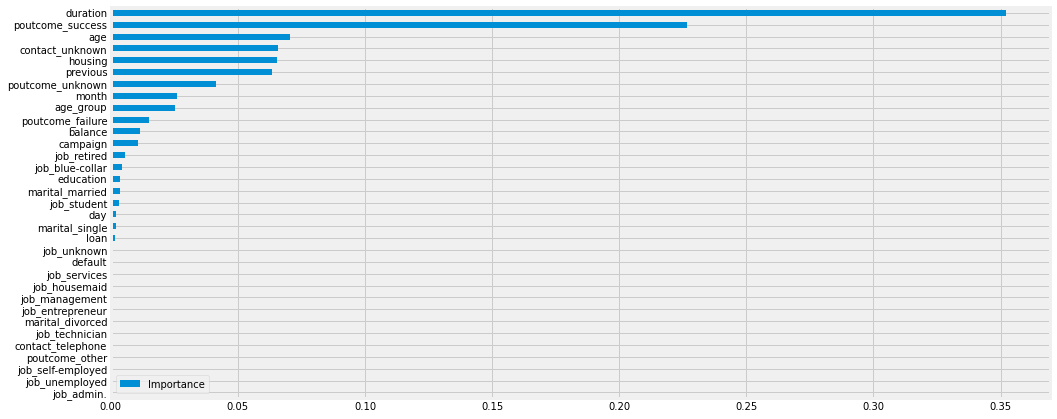

In [57]:
rfc_over = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 3, 
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 50, n_jobs = -1, 
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
rfc_over.fit(X, y)
print('Feature Importance for Random Forest Classifier ', '--'*38)
feature_importances = pd.DataFrame(rfc_over.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))


## Observation
- We can see duration , previous outcome, age , housing  , month , balance are some of the major deciding feartures. We can explore more on these feature for more digging , customer segmentation and better recoomdation .

In [58]:
abcl = AdaBoostClassifier(n_estimators = 10, random_state = random_state)
base_model = [abcl]
n_splits = 5
df = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier')
df1=df1.append(df)

Model- Adaboost classifier and CV- 0
--------------------
Training Score: 0.895
Test Score: 0.897
Accuracy Score: 0.897
Precision Score - Subscribe: 0.606
Recall Score - Subscribe: 0.349
f1 Score - Subscribe: 0.443
Precision Score - Macro: 0.762
Recall Score - Macro: 0.659
f1 Score - Macro: 0.693


Model- Adaboost classifier and CV- 1
--------------------
Training Score: 0.891
Test Score: 0.889
Accuracy Score: 0.889
Precision Score - Subscribe: 0.533
Recall Score - Subscribe: 0.385
f1 Score - Subscribe: 0.447
Precision Score - Macro: 0.727
Recall Score - Macro: 0.670
f1 Score - Macro: 0.693


Model- Adaboost classifier and CV- 2
--------------------
Training Score: 0.891
Test Score: 0.890
Accuracy Score: 0.890
Precision Score - Subscribe: 0.545
Recall Score - Subscribe: 0.363
f1 Score - Subscribe: 0.436
Precision Score - Macro: 0.732
Recall Score - Macro: 0.661
f1 Score - Macro: 0.687


Model- Adaboost classifier and CV- 3
--------------------
Training Score: 0.892
Test Score: 0.894
Ac

In [59]:
X.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age_group'],
      dtype='object')

In [63]:
df1

,Accuracy,Precision_Subscribe,Precision_Macro,Recall_Subscribe,Recall_Macro,f1_Subscribe,f1_Macro
Logistic Regression With Hyperparameter Tuning,0.891,0.577,0.743,0.259,0.617,0.358,0.649
Random Forest,0.895,0.648,0.776,0.217,0.601,0.325,0.634
AdaBoost Classifier,0.892,0.560,0.739,0.361,0.661,0.438,0.689


Try oversampling and check results

In [64]:
base_model = [LR]
n_splits = 5
df = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression With Hyperparameter Tuning ,Oversampling',oversampling=True)
df1=df1.append(df)

Model- Logistic regression with hyperparameter tuning ,oversampling and CV- 0
--------------------
Training Score: 0.809
Test Score: 0.802
Accuracy Score: 0.802
Precision Score - Subscribe: 0.346
Recall Score - Subscribe: 0.778
f1 Score - Subscribe: 0.478
Precision Score - Macro: 0.655
Recall Score - Macro: 0.791
f1 Score - Macro: 0.678


Model- Logistic regression with hyperparameter tuning ,oversampling and CV- 1
--------------------
Training Score: 0.809
Test Score: 0.810
Accuracy Score: 0.810
Precision Score - Subscribe: 0.355
Recall Score - Subscribe: 0.766
f1 Score - Subscribe: 0.485
Precision Score - Macro: 0.659
Recall Score - Macro: 0.791
f1 Score - Macro: 0.684


Model- Logistic regression with hyperparameter tuning ,oversampling and CV- 2
--------------------
Training Score: 0.804
Test Score: 0.803
Accuracy Score: 0.803
Precision Score - Subscribe: 0.346
Recall Score - Subscribe: 0.769
f1 Score - Subscribe: 0.477
Precision Score - Macro: 0.655
Recall Score - Macro: 0.788
f1 

In [65]:

base_model = [RF]
n_splits = 5
df = train_and_predict(n_splits, base_model, X, y, 'Random Forest,Oversampling',oversampling=True)
df1=df1.append(df)

Model- Random forest,oversampling and CV- 0
--------------------
Training Score: 0.932
Test Score: 0.887
Accuracy Score: 0.887
Precision Score - Subscribe: 0.518
Recall Score - Subscribe: 0.440
f1 Score - Subscribe: 0.476
Precision Score - Macro: 0.723
Recall Score - Macro: 0.693
f1 Score - Macro: 0.706


Model- Random forest,oversampling and CV- 1
--------------------
Training Score: 0.933
Test Score: 0.889
Accuracy Score: 0.889
Precision Score - Subscribe: 0.531
Recall Score - Subscribe: 0.435
f1 Score - Subscribe: 0.478
Precision Score - Macro: 0.729
Recall Score - Macro: 0.692
f1 Score - Macro: 0.708


Model- Random forest,oversampling and CV- 2
--------------------
Training Score: 0.933
Test Score: 0.882
Accuracy Score: 0.882
Precision Score - Subscribe: 0.498
Recall Score - Subscribe: 0.487
f1 Score - Subscribe: 0.492
Precision Score - Macro: 0.715
Recall Score - Macro: 0.711
f1 Score - Macro: 0.713


Model- Random forest,oversampling and CV- 3
--------------------
Training Score

In [67]:
base_model = [abcl]
n_splits = 5
df = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier,Oversampling',oversampling=True)
df1=df1.append(df)

Model- Adaboost classifier,oversampling and CV- 0
--------------------
Training Score: 0.872
Test Score: 0.842
Accuracy Score: 0.842
Precision Score - Subscribe: 0.395
Recall Score - Subscribe: 0.663
f1 Score - Subscribe: 0.495
Precision Score - Macro: 0.673
Recall Score - Macro: 0.764
f1 Score - Macro: 0.700


Model- Adaboost classifier,oversampling and CV- 1
--------------------
Training Score: 0.881
Test Score: 0.855
Accuracy Score: 0.855
Precision Score - Subscribe: 0.414
Recall Score - Subscribe: 0.574
f1 Score - Subscribe: 0.481
Precision Score - Macro: 0.677
Recall Score - Macro: 0.733
f1 Score - Macro: 0.698


Model- Adaboost classifier,oversampling and CV- 2
--------------------
Training Score: 0.878
Test Score: 0.843
Accuracy Score: 0.843
Precision Score - Subscribe: 0.394
Recall Score - Subscribe: 0.634
f1 Score - Subscribe: 0.486
Precision Score - Macro: 0.671
Recall Score - Macro: 0.752
f1 Score - Macro: 0.697


Model- Adaboost classifier,oversampling and CV- 3
-----------

In [70]:
df1

,Accuracy,Precision_Subscribe,Precision_Macro,Recall_Subscribe,Recall_Macro,f1_Subscribe,f1_Macro
Logistic Regression With Hyperparameter Tuning,0.891,0.577,0.743,0.259,0.617,0.358,0.649
Random Forest,0.895,0.648,0.776,0.217,0.601,0.325,0.634
AdaBoost Classifier,0.892,0.560,0.739,0.361,0.661,0.438,0.689
"Logistic Regression With Hyperparameter Tuning ,Oversampling",0.804,0.347,0.655,0.767,0.788,0.478,0.679
"Random Forest,Oversampling",0.884,0.508,0.719,0.458,0.699,0.481,0.708
"AdaBoost Classifier,Oversampling",0.847,0.403,0.675,0.637,0.756,0.493,0.701


## Observation
- We can see that there is increase in recall when oversampling is used .
- There is drop in precision due to over sampling .
- Highest F1 score is achieved by Adaboost classifier with over sampling .

1. More appropriate timing

When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

2. Smarter marketing design

By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.
